In [43]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print("adding following folder to path: ",module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

adding following folder to path:  /home/enis/projects/nna/src


In [42]:
import numpy as np 
from numpy import linspace
import pandas as pd


import datetime
from scipy import stats
import time
import copy
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import precision_recall_fscore_support


import csv 
from pathlib import Path
from os import listdir
import pickle

from tabulate import tabulate


from datetime import datetime,timedelta

import itertools


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import ListedColormap
from matplotlib import cm

from pytz import timezone




In [17]:
from pre_process_func import read_queue
from fileUtils import read_file_properties
from labeling_utils import load_labels
from visUtils import get_cycle,createTimeIndex,file2TableDict,reverseTableDict

In [18]:
dataFlder="/home/enis/projects/nna/data/"
resultsFlder="/home/enis/projects/nna/results/"


In [19]:
# Weather was here moved to Labeling/metadata_weather_coordinates.ipynb
# TODO

In [20]:
id2name={}
id2name['09-USGS']="USGS"
id2name['19-Itkillik2']="Itkilik 2"
id2name['01-Itkillik']="Itkilik 1"
id2name['02-Colville2']="Colville 2"
id2name['03-OceanPt']="Ocean Pt"
id2name['04-Colville4']="Colville 4"
id2name['05-Colville5']="Colville 5"

tag_set=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]



In [7]:
file_properties_df=pd.read_pickle("../../data/stinchcomb_dataV1.pkl")

#important to keep them in order
file_properties_df.sort_values(by=['timestamp'],inplace=True)

# delete older than 2016
fromtime=datetime(2016, 1, 1, 0)
file_properties_df=file_properties_df[file_properties_df.timestamp>=fromtime]


In [8]:
model_tag_names=["Neural Net_Songbird",
"Neural Net_Water Bird",
"Neural Net_Insect",
"Neural Net_Running Water",
"Neural Net_Rain",
"Neural Net_Cable",
"Neural Net_Wind",
"Neural Net_Aircraft",]

# inference_file="/home/enis/projects/nna/notebooks/Visualizations/Neural Net_Insect_tags_on_real_Dec:6.npy"
inference_file="/home/enis/projects/nna/results/predictions/8tags_on_8sites_pathV2.npy"
gathered_results_perTag=np.load(inference_file,allow_pickle=True)[()]



In [9]:
# PARAMS
# FREQS to reduce results 
freq="2H"

selected_tag_name=model_tag_names[0]

# possible places to pick
# sorted(pd.unique(file_properties_df.site_id.values))
# areas to be visualized
selected_areas=['05-Colville5',
'19-Itkillik2',
'04-Colville4',
# '20-Umiat', # old data
'03-OceanPt',
'02-Colville2',
'01-Itkillik',
'09-USGS']


# selected_areas=["15","21","22","27","31","35","37","48",]


In [10]:

globalindex,all_start,all_end=createTimeIndex(selected_areas,file_properties_df,freq)

globalcolumns=model_tag_names#selected_areas+weather_cols


In [12]:
print(" Duration of selected data period:",(all_end-all_start).days,"days")
print(" Starts: {} \n Ends:   {}".format(all_end,all_start))

 Duration of selected data period: 86 days
 Starts: 2016-08-27 23:59:59 
 Ends:   2016-06-02 00:00:00


In [13]:
df_dict,no_result_paths=file2TableDict(selected_areas,model_tag_names,globalindex,globalcolumns,
                    file_properties_df,gathered_results_perTag,"10S")

print("{} number of files do not have results".format(len(no_result_paths)))

df_dict_reverse=reverseTableDict(selected_areas,df_dict,model_tag_names)


176 number of files do not have results


In [14]:
df_count,df_sums=df_dict_reverse[selected_tag_name]

In [193]:
df_count.sum()

05-Colville5    448107.0
19-Itkillik2    435909.0
04-Colville4    405627.0
03-OceanPt      446531.0
02-Colville2    448783.0
01-Itkillik     520480.0
09-USGS         612729.0
dtype: float64

In [194]:
df_sums

,05-Colville5,19-Itkillik2,04-Colville4,03-OceanPt,02-Colville2,01-Itkillik,09-USGS
2016-06-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-02 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-02 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-02 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-02 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2016-08-31 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-31 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-31 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-31 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
df_sums.sum()

CLVL5        241685
ITKILLIK2     53870
CLVL4        288213
OCNPT         63509
CLVL2        211947
ITKILLIK1    250981
USGS          89331
dtype: int64

In [157]:
df_sums=df_sums.dropna(how='all')

In [163]:
df_count[df_count>0].dropna(how='all')



,CLVL5,ITKILLIK2,CLVL4,OCNPT,CLVL2,ITKILLIK1,USGS
2016-06-02 12:00:00,NaN,NaN,NaN,NaN,19.0,NaN,NaN
2016-06-02 14:00:00,NaN,NaN,88.0,NaN,720.0,NaN,NaN
2016-06-02 16:00:00,522.0,NaN,720.0,NaN,720.0,NaN,NaN
2016-06-02 18:00:00,720.0,NaN,720.0,NaN,720.0,NaN,NaN
2016-06-02 20:00:00,720.0,NaN,720.0,NaN,720.0,NaN,NaN
...,...,...,...,...,...,...,...
2016-08-27 00:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 02:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 04:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 06:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN


In [195]:
df_count[df_count>0].dropna(how='all')



,05-Colville5,19-Itkillik2,04-Colville4,03-OceanPt,02-Colville2,01-Itkillik,09-USGS
2016-06-02 12:00:00,NaN,NaN,NaN,NaN,19.0,NaN,NaN
2016-06-02 14:00:00,NaN,NaN,66.0,NaN,720.0,NaN,NaN
2016-06-02 16:00:00,522.0,NaN,720.0,NaN,720.0,NaN,NaN
2016-06-02 18:00:00,720.0,NaN,720.0,NaN,720.0,NaN,NaN
2016-06-02 20:00:00,720.0,NaN,720.0,NaN,720.0,NaN,NaN
...,...,...,...,...,...,...,...
2016-08-27 00:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 02:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 04:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN
2016-08-27 06:00:00,NaN,NaN,NaN,720.0,NaN,720.0,NaN


In [164]:
df_sums[df_sums>0].dropna(how='all')
# 

,CLVL5,ITKILLIK2,CLVL4,OCNPT,CLVL2,ITKILLIK1,USGS
2016-06-02 12:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2016-06-02 14:00:00,NaN,NaN,31.0,NaN,569.0,NaN,NaN
2016-06-02 16:00:00,380.0,NaN,625.0,NaN,661.0,NaN,NaN
2016-06-02 18:00:00,488.0,NaN,688.0,NaN,571.0,NaN,NaN
2016-06-02 20:00:00,625.0,NaN,704.0,NaN,567.0,NaN,NaN
...,...,...,...,...,...,...,...
2016-08-27 00:00:00,NaN,NaN,NaN,68.0,NaN,6.0,NaN
2016-08-27 02:00:00,NaN,NaN,NaN,84.0,NaN,32.0,NaN
2016-08-27 04:00:00,NaN,NaN,NaN,227.0,NaN,184.0,NaN
2016-08-27 06:00:00,NaN,NaN,NaN,304.0,NaN,243.0,NaN


In [196]:
df_freq=df_sums/df_count
# del df_freq['UMIAT']
# print(df_freq)
df_freq=df_freq*100
df_freq=df_freq.dropna(how='all')
# df_freq=pd.concat([df_freq, normal_weather], axis=1, join='inner')

In [197]:
df_freq.sum()

05-Colville5    33599.126795
19-Itkillik2     7498.361150
04-Colville4    40210.959970
03-OceanPt       8747.659305
02-Colville2    29507.235357
01-Itkillik     34984.633753
09-USGS         11252.053891
dtype: float64

In [172]:
df_freq.sum() # OLD

CLVL5        33603.125679
ITKILLIK2     7500.246179
CLVL4        40118.451191
OCNPT         8829.737120
CLVL2        29447.781134
ITKILLIK1    35034.642786
USGS         12415.776623
dtype: float64

In [198]:
df_freq.sum() #NEW

05-Colville5    33599.126795
19-Itkillik2     7498.361150
04-Colville4    40210.959970
03-OceanPt       8747.659305
02-Colville2    29507.235357
01-Itkillik     34984.633753
09-USGS         11252.053891
dtype: float64

In [199]:
df_freq.index

DatetimeIndex(['2016-06-02 12:00:00', '2016-06-02 14:00:00',
               '2016-06-02 16:00:00', '2016-06-02 18:00:00',
               '2016-06-02 20:00:00', '2016-06-02 22:00:00',
               '2016-06-03 00:00:00', '2016-06-03 02:00:00',
               '2016-06-03 04:00:00', '2016-06-03 06:00:00',
               ...
               '2016-08-26 14:00:00', '2016-08-26 16:00:00',
               '2016-08-26 18:00:00', '2016-08-26 20:00:00',
               '2016-08-26 22:00:00', '2016-08-27 00:00:00',
               '2016-08-27 02:00:00', '2016-08-27 04:00:00',
               '2016-08-27 06:00:00', '2016-08-27 08:00:00'],
              dtype='datetime64[ns]', length=1031, freq='2H')

In [204]:
#Load coordinates
# TODO in /Labeling/metadata_weather_coordinates.ipynb

In [216]:
# fake it, we do not care about them right now
cord_list=[(i,(0,0)) for i in df_freq.columns]

In [206]:
months=[df_freq.loc['2016-06':'2016-06'],df_freq.loc['2016-07':'2016-07'],df_freq.loc['2016-08':'2016-08'],]


# make them all same month for aligning 
for i,month in enumerate(months):
    months[i]=month.rename(index=lambda x: x.replace(month=7))



In [208]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot'),  # Same as '-.
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),
    ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


In [221]:
cord_list,weather_cols

([('05-Colville5', (0, 0)),
  ('19-Itkillik2', (0, 0)),
  ('04-Colville4', (0, 0)),
  ('03-OceanPt', (0, 0)),
  ('02-Colville2', (0, 0)),
  ('01-Itkillik', (0, 0)),
  ('09-USGS', (0, 0))],
 [])

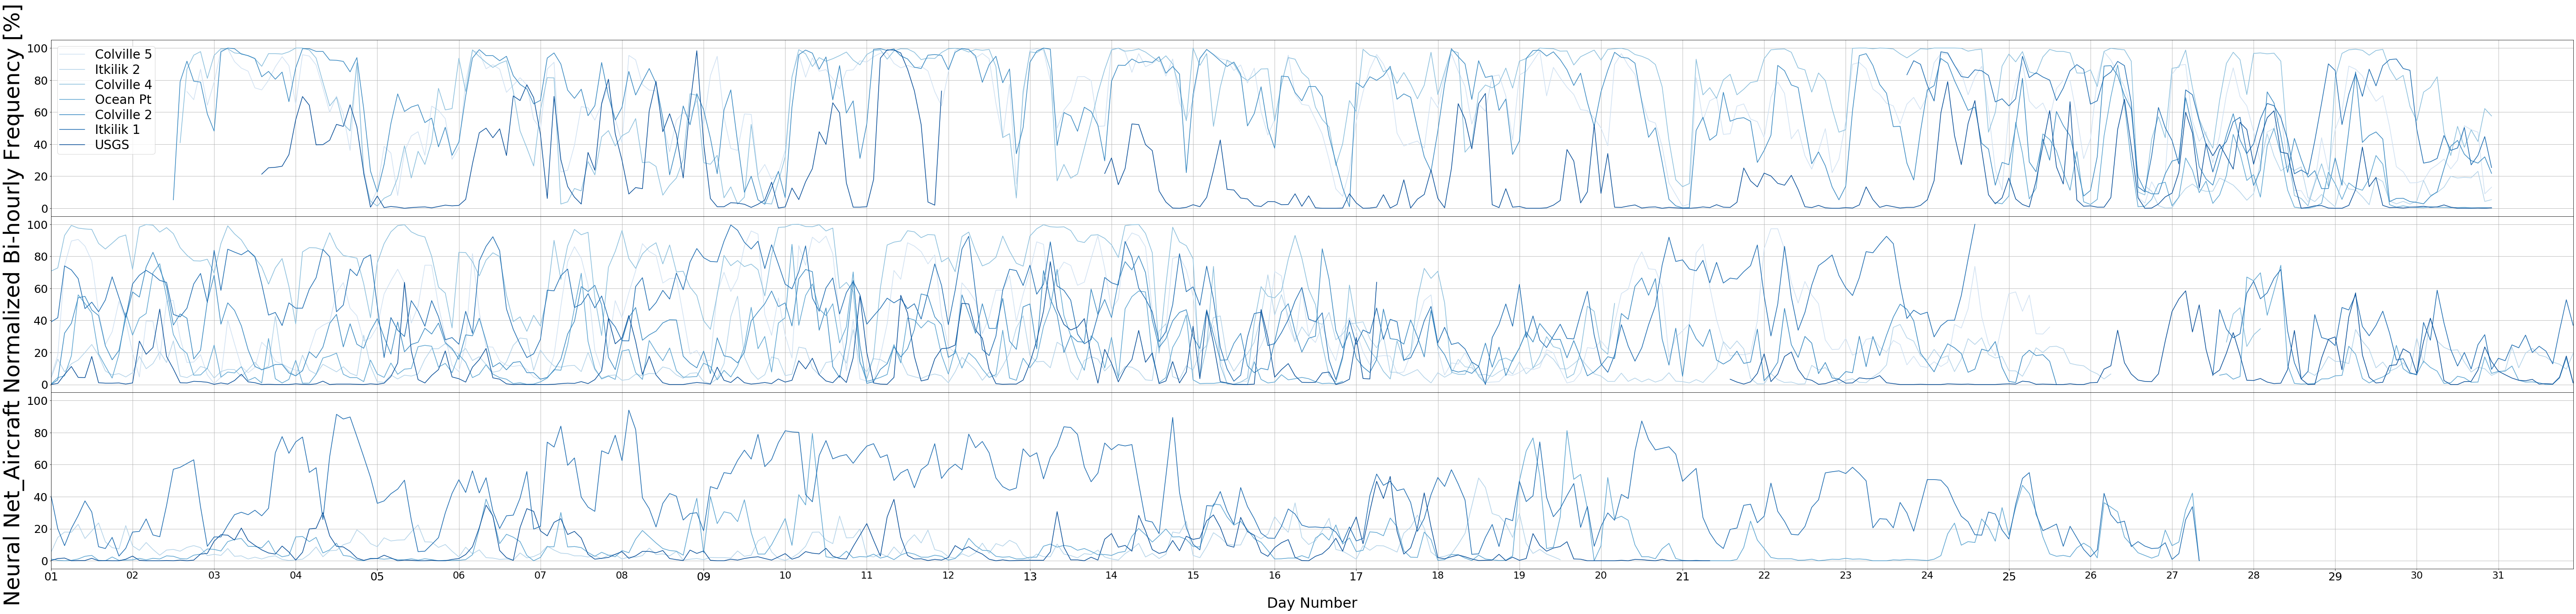

In [220]:

plt.rcParams["axes.prop_cycle"] = get_cycle("Blues",N=8)


fig, ax = plt.subplots(figsize=(80,18),nrows=len(months),sharex=True, sharey=True,gridspec_kw={'hspace': 0})

markers = itertools.cycle((',', '+', '.', 'o', '*')) 

weather_colors=["firebrick","darkorange","green","seagreen","lightpink"]

for monthi,month in enumerate(months):
    # for col in df_freq.columns:
    for i,(col,(lat,long)) in enumerate(cord_list):
        if col in weather_cols:
            index=weather_cols.index(col)
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ",color=weather_colors[index])
        else:
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ")
        

ax[0].legend( labels=[id2name.get(x[0],x[0]) for x in cord_list],loc='upper left', 
            borderpad=0.2, labelspacing=0.2, fontsize=28, 
            frameon=True) # frameon=False to remove frame.


ax[1].set_ylabel('{} Normalized Bi-hourly Frequency [%]'.format(tag_name),fontsize=48) #, fontweight='black')

ax[-1].set_xlabel('Day Number', fontsize=32)


for an_ax in ax:
    
    locator=dates.DayLocator()
    an_ax.xaxis.set_minor_locator(locator)

    an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))

    an_ax.xaxis.grid(True, which="minor")
    an_ax.xaxis.grid(True, which="major")


    an_ax.xaxis.set_major_locator(dates.AutoDateLocator())
    an_ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n'))

    an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    an_ax.yaxis.grid()
    an_ax.tick_params(labelsize=22,which="minor")
    an_ax.tick_params(labelsize=25,which="major")
    
plt.tight_layout()
plt.margins(x=0)


plt.show()
fig.savefig("TESTTEST_"+tag_name+"_"+freq +'.svg')


